In [0]:
# Loading and normalizing CIFAR10

import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='.data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

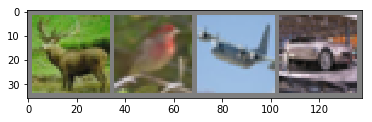

 deer  bird plane   car


In [7]:
# get some random training images

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# define convolutional neural network

import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Net(nn.Module):
  
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [0]:
net = Net()

In [0]:
# define loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
# train the network

for epoch in range(2):
  
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    
    optimizer.zero_grad()
    
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d, %5d] loss : %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0
      
print('Finished Training')

[1,  2000] loss : 2.197
[1,  4000] loss : 1.850
[1,  6000] loss : 1.664
[1,  8000] loss : 1.561
[1, 10000] loss : 1.482
[1, 12000] loss : 1.458
[2,  2000] loss : 1.396
[2,  4000] loss : 1.362
[2,  6000] loss : 1.351
[2,  8000] loss : 1.338
[2, 10000] loss : 1.277
[2, 12000] loss : 1.291
Finished Training


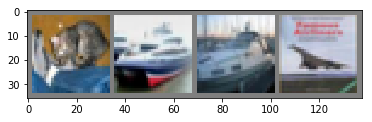

GroundTruth:    cat  ship  ship plane


In [14]:
# test on test data

dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car   car plane


In [21]:
# Evaluating accuracy

correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()
    
print('Accuracy : %d %%' %(100*correct/total))

Accuracy : 54 %
